# Calculations relevant to low-ell SATs and the TMA

Including:
- Beam patterns near sidelobes, diffraction + Ruze
- N_ell expected for 3 SAT tubes vs all of TMA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10,10]


def GaussBeam(thetas_rad,d,lam0,edgetaper_dB):
    nu0 = 3.0e8/lam0
    numultiplier = np.arange(0.9,1.1,0.005)
    rho = np.linspace(0,1,5000)  # r/r_ap
    redge = d/2   #meters
    w0 = redge/(0.3393*np.sqrt(edgetaper_dB)) # goldsmith eq 2.35a, page 34 of pdf, 19 of book.
    r_ap = rho*redge 
    
    P_theta_tot = np.zeros(len(thetas_rad))
    
    for mm in numultiplier:
        nu = nu0*mm
        lam = 3.0e8/nu
        print('lam = ',lam)
        
        E_U = np.array([])
        U = np.pi*d*np.sin(thetas_rad)/lam
        
        # E_ap(rho) from gaussian beam formula
        E_ap = np.exp(-(r_ap/w0)**2)

        for uu in U:
            val = np.trapz(E_ap*jv(0,rho*uu)*rho,rho)
            E_U = np.append(E_U,val)

        P_theta = np.abs(E_U)**2
        P_theta_tot += P_theta/np.max(P_theta) #normalize to 1 on axis.
        
    P_int = 2*np.pi*np.trapz(P_theta_tot*np.sin(theta_rad), theta_rad)
    P_theta_tot = P_theta_tot/P_int #ensure beam integrates to unity.
    return(P_theta_tot)

lambda =  0.003
lam =  0.0033333333333333335
lam =  0.0033149171270718232
lam =  0.0032967032967032967
lam =  0.003278688524590164
lam =  0.003260869565217391
lam =  0.003243243243243243
lam =  0.0032258064516129032
lam =  0.0032085561497326204
lam =  0.0031914893617021275
lam =  0.0031746031746031746
lam =  0.003157894736842105
lam =  0.0031413612565445027
lam =  0.003125
lam =  0.00310880829015544
lam =  0.0030927835051546386
lam =  0.0030769230769230765
lam =  0.0030612244897959178
lam =  0.0030456852791878168
lam =  0.00303030303030303
lam =  0.0030150753768844215
lam =  0.003
lam =  0.0029850746268656712
lam =  0.0029702970297029695
lam =  0.002955665024630541
lam =  0.0029411764705882353
lam =  0.0029268292682926825
lam =  0.0029126213592233
lam =  0.0028985507246376808
lam =  0.0028846153846153848
lam =  0.002870813397129186
lam =  0.0028571428571428563
lam =  0.0028436018957345966
lam =  0.002830188679245283
lam =  0.002816901408450704
lam =  0.0028037383177570087
lam =  0.0027

NameError: name 'y' is not defined

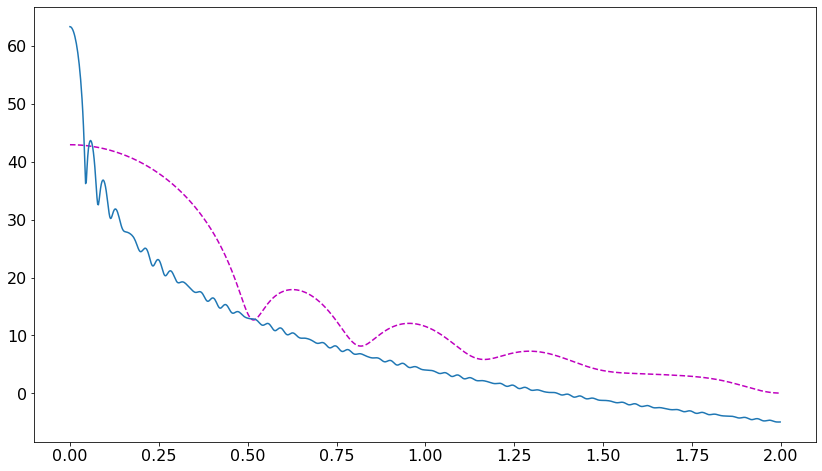

In [2]:
from scipy.special import jv as jv
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [14,8]

d = 5.0      # Telescope diameter
lam = 3.0e-3 # wavelength in meters.
eta_ao=1.0   # Aperture efficiency.  Assume perfect for both Ruze and Lambertian scattering.
print('lambda = ',lam)

theta=np.arange(0.0, 2.0, 0.002)#Range of angles to plot
theta_rad = theta*np.pi/180.

fig, axs = plt.subplots()

# SAT beam, using goldsmith eq 6.37, and bessel funcion jv
# pdf page 152
d = 0.5 #m
edgetaper_dB = 10 # a guess
P_m = GaussBeam(theta_rad,d,lam,edgetaper_dB)
axs.plot(theta,10*np.log10(P_m),'--m',label="0.5m SAT, 10dB edgetaper")
P_m_int = 2*np.pi*np.trapz(P_m*np.sin(theta_rad), theta_rad)
print('SAT P_m_int = ',P_m_int)

# cheesy main beam estimate for TMA
d = 5.0 #m
edgetaper_dB = 3 # a guess
P_m = GaussBeam(theta_rad,d,lam,edgetaper_dB)
axs.plot(theta,10*np.log10(P_m),label="5m LAT, 3dB edgetaper")
P_m_int = 2*np.pi*np.trapz(P_m*np.sin(theta_rad), theta_rad)
print('P_m_int = ',P_m_int,'r')
P_m_int = 2*np.pi*np.trapz(P_m*np.sin(theta_rad), theta_rad)
print('LAT P_m_int = ',P_m_int)


# first, plot beam profiles for different correlation lengths
cvec   = np.array([50.0, 100.0, 500.0])*1e-3  # correlation length, meters.
rmsvec = np.array([5.0, 5.0, 10.0])*1e-6     # rms at that c, meters.
labelstr = ['LAT Ruze: c=50mm, rms=5u', 'LAT Ruze: c=100mm, rms=5u', 'LAT Ruze: c=500mm, rms=10u' ]
iivec = [0,1,2]
for ii in iivec:
    rms = rmsvec[ii]
    c = cvec[ii]
    sigma=(4.0*np.pi*rms)/lam
    if (sigma**2)<=1:
        prefac = (1.0/eta_ao)*((c/lam)**2)*(np.exp(sigma**2)-1)
        Ruze_scat=prefac*np.exp(-((np.pi*c*theta_rad)/(2*y))**2) #Baars eqn 4.40
    else:
        print('Warning:  large sigma case.')
        Ruze_scat=(1.0/eta_ao)*((c/lam)**2)*(np.exp(sigma**2)-1)*(1/(sigma**2))*np.exp(-((np.pi*c*theta_rad)/(2*y*sigma))**2) #Baars 4.40

    # 2D integral, d_Omega = (sin(theta)*dphi * dtheta)
    ruze_int = 2*np.pi*np.trapz(Ruze_scat*np.sin(theta_rad), theta_rad)
    print("c = {0:5.3e}, P_int = {1:5.3e}".format(c,ruze_int))
    axs.plot(theta,10*np.log10(Ruze_scat), label=labelstr[ii])

axs.set_ylim(-20,80)
axs.set_title('freq = 90 GHz, 20% frac. bandwidth')
axs.set_xlabel('Beam angle (deg)')
axs.set_ylabel('Beam response (dBi)')
axs.legend()
axs.grid()





# Low-ell N_ell curves

In [11]:
## V3R0 25 Configuration
Pole_LAT = {
            #freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
            20: [11.0, 9.31, 1200, 4.2, 13.16, 150, 2.7],
            27: [8.4, 4.6, 1200, 4.2, 6.5, 150, 2.7],
            39: [5.8, 2.94, 1200, 4.2, 4.15, 150, 2.7], 
            93: [2.5, 0.45, 1200, 4.2, 0.63, 150, 2.6],
            145: [1.6, 0.41, 1900, 4.1, 0.59, 200, 2.2],
            225: [1.1, 1.29, 2100, 4.1, 1.83, 200, 2.2],
            278: [1.0, 3.07, 2100, 3.9, 4.34, 200, 2.2],
            }

Chile_LAT = {
            #freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
            27: [7.4, 21.34, 415, 3.5, 30.23, 700, 1.4],
            39: [5.1, 11.67, 391, 3.5, 16.53, 700, 1.4], 
            93: [2.2, 1.89, 1932, 3.5, 2.68, 700, 1.4],
            145: [1.4, 2.09, 3917, 3.5, 2.96, 700, 1.4],
            225: [1.0, 6.90, 6740, 3.5, 9.78, 700, 1.4],
            278: [0.9, 16.88, 6792, 3.5, 23.93, 700, 1.4],
            }

Chile_LAT_poledeep = {
            #freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
            27: [7.4, 4.6, 415, 3.5, 6.5, 700, 1.4],
            39: [5.1, 2.94, 391, 3.5, 4.15, 700, 1.4], 
            93: [2.2, 0.45, 1932, 3.5, 0.63, 700, 1.4],
            145: [1.4, 0.41, 3917, 3.5, 0.59, 700, 1.4],
            225: [1.0, 1.29, 6740, 3.5, 1.83, 700, 1.4],
            278: [0.9, 3.07, 6792, 3.5, 4.34, 700, 1.4],
            }

Pole_SAT = {
            #freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_E, elknee_E, alphaknee_E, whitenoise_B, elknee_B, alphaknee_B] 
            30: [72.8, 5.64, 150, 4.4, 3.74, 60, 2.2, 3.53, 60, 1.7],
            40: [72.8, 7.14, 150, 4.4, 4.73, 60, 2.2, 4.46, 60, 1.7],
            85: [25.5, 1.41, 150, 4.4, 0.93, 60, 2.2, 0.88, 60, 1.7], 
            95: [22.7, 1.24, 150, 4.4, 0.82, 60, 2.2, 0.78, 60, 1.7],
            145: [25.5, 2.71, 230, 3.8, 1.25, 65, 3.1, 1.23, 60, 3.0],
            155: [22.7, 2.90, 230, 3.8, 1.34, 65, 3.1, 1.34, 60, 3.0],
            220: [13.0, 7.50, 230, 3.8, 3.48, 65, 3.1, 3.48, 60, 3.0],
            270: [13.0, 12.85, 230, 3.8, 8.08, 65, 3.1, 5.97, 60, 3.0],
            }

def N_ell(telescope,freq,spectrum,ellvec):
    # telescope = 'Pole_SAT' or 'Pole_LAT' dictionary
    # freq = one of the frequency keys in that dictionary
    # spectrum = 'T' or 'E' or 'B'
    fwhm = telescope[freq][0]*(1/60)*(np.pi/180.)  # arcminutes to radians
    if spectrum == 'T':
        print("T")
        offset = 0
    if (spectrum == 'E') or (spectrum=='P'):
        print("E or P")
        offset = 3
    if spectrum == 'B':
        print("B")
        offset = 6
    delta_radians = telescope[freq][1+offset]*np.pi/180./60. # uKarcmin to uKrad
    ellknee = telescope[freq][2+offset]
    alphaknee = telescope[freq][3+offset]
    
    print(delta_radians**2)
    
    Nell = (delta_radians**2)*np.exp(ellvec*(ellvec+1)*(fwhm**2)/(8*np.log(2)))*(1 + (ellknee/ellvec)**alphaknee)
    return(Nell)


B
6.552659163411863e-08
B
5.1480343943953754e-08
B
1.2801547066536427e-07
B
1.51936399713615e-07
B
1.0247330001624878e-06
E or P
3.3584070531484614e-08
E or P
2.9454812174375908e-08
E or P
2.8337035475658575e-07
E or P
3.3584070531484614e-08
E or P
2.9454812174375908e-08
B
6.552659163411863e-08
B
5.1480343943953754e-08
B
1.2801547066536427e-07
B
1.51936399713615e-07


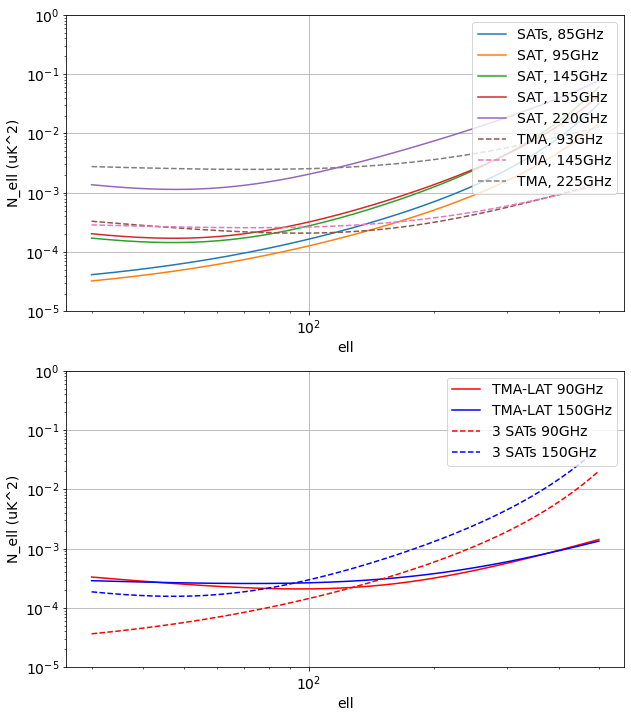

In [4]:
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10, 12]
plt.rcParams['text.usetex'] = False

fig,axs = plt.subplots(2,1)

ellvec = np.arange(30,500)
dell_fac = ellvec*(ellvec+1)/(2*np.pi)
#
# Make the PBDR N_ell plot for both SATs and LATs
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_SAT,85,'B',ellvec),label='SATs, 85GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_SAT,95,'B',ellvec),label='SAT, 95GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_SAT,145,'B',ellvec),label='SAT, 145GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_SAT,155,'B',ellvec),label='SAT, 155GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_SAT,220,'B',ellvec),label='SAT, 220GHz')
#
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_LAT, 93,'P',ellvec),'--',label='TMA, 93GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_LAT,145,'P',ellvec),'--',label='TMA, 145GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_LAT,225,'P',ellvec),'--',label='TMA, 225GHz')
axs[0].set_xlabel('ell')
axs[0].set_ylabel('N_ell (uK^2)')
axs[0].legend(loc='upper right')
axs[0].set_ylim(1e-5, 1)
axs[0].grid()

# Make a plot that combines all the 90's and 150's
# 
# Option 1:  3 SATs + TMA-LAT
Nsats = 3
Nell90 =  1/(1/N_ell(Pole_LAT, 93 ,'P',ellvec) )
axs[1].loglog(ellvec,dell_fac*Nell90 ,'r',label='TMA-LAT 90GHz')
Nell150 = 1/(1/N_ell(Pole_LAT, 145,'P',ellvec) )
axs[1].loglog(ellvec,dell_fac*Nell150,'b',label='TMA-LAT 150GHz')
#
# Option 2:  3 SATs
Nsats = 3
Nell90 = 1/( 1/((6/Nsats)*N_ell(Pole_SAT, 85,'B',ellvec)) + 1/((6/Nsats)*N_ell(Pole_SAT, 95,'B',ellvec)))
axs[1].loglog(ellvec,dell_fac*Nell90,'--r', label='3 SATs 90GHz')
Nell150 = 1/( 1/((6/Nsats)*N_ell(Pole_SAT, 145,'B',ellvec)) + 1/((6/Nsats)*N_ell(Pole_SAT, 155,'B',ellvec)))
axs[1].loglog(ellvec,dell_fac*Nell150,'--b',label='3 SATs 150GHz')


axs[1].set_xlabel('ell')
axs[1].set_ylabel('N_ell (uK^2)')
axs[1].legend(loc='upper right')
axs[1].set_ylim(1e-5, 1)
axs[1].grid()
#Nell = N_ell(Pole_LAT,93,'P',ellvec)
#plt.semilogy(ellvec,Nell,'--')

#Nell = N_ell(Pole_LAT,145,'P',ellvec)
#plt.semilogy(ellvec,Nell,'--')

B
1.054390890616721e-06
E or P
3.575023884996789e-06
E or P
3.575023884996789e-06
B
6.552659163411863e-08
B
5.1480343943953754e-08
B
1.2801547066536427e-07
B
1.51936399713615e-07
E or P
3.3584070531484614e-08
E or P
2.9454812174375908e-08
B
1.0247330001624878e-06
E or P
2.8337035475658575e-07
E or P
2.8337035475658575e-07


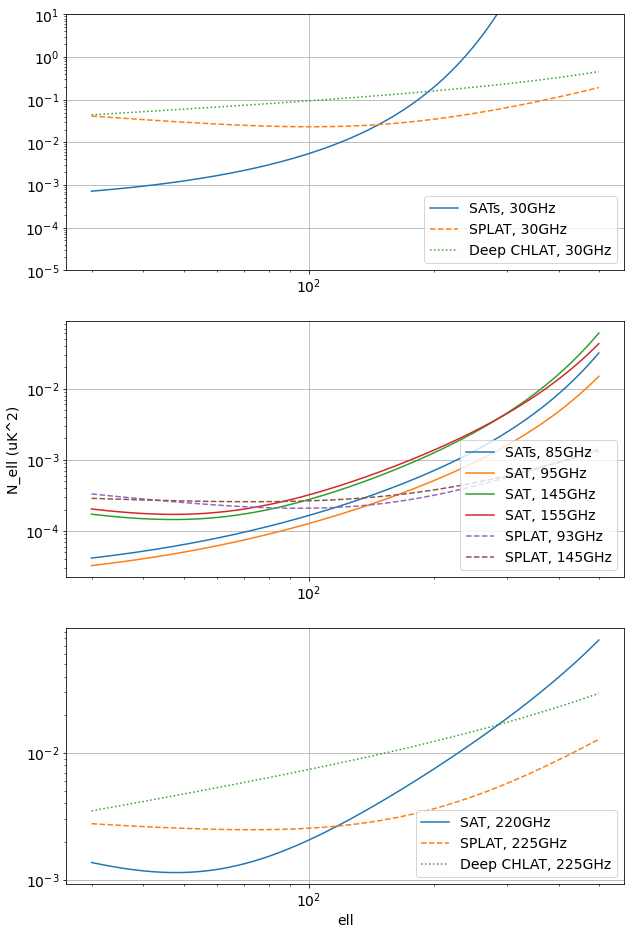

In [15]:
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10, 16]
plt.rcParams['text.usetex'] = False

fig,axs = plt.subplots(3,1)

ellvec = np.arange(30,500)
dell_fac = ellvec*(ellvec+1)/(2*np.pi)
#
# Make the PBDR N_ell plot for both SATs and LATs
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_SAT,30,'B',ellvec),label='SATs, 30GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Pole_LAT,27,'P',ellvec),'--',label='SPLAT, 30GHz')
#axs[0].loglog(ellvec,dell_fac*N_ell(Pole_LAT,20,'P',ellvec),'--',label='SPLAT, 20GHz')
axs[0].loglog(ellvec,dell_fac*N_ell(Chile_LAT_poledeep,27,'P',ellvec),':',label='Deep CHLAT, 30GHz')


axs[1].loglog(ellvec,dell_fac*N_ell(Pole_SAT,85,'B',ellvec),label='SATs, 85GHz')
axs[1].loglog(ellvec,dell_fac*N_ell(Pole_SAT,95,'B',ellvec),label='SAT, 95GHz')
axs[1].loglog(ellvec,dell_fac*N_ell(Pole_SAT,145,'B',ellvec),label='SAT, 145GHz')
axs[1].loglog(ellvec,dell_fac*N_ell(Pole_SAT,155,'B',ellvec),label='SAT, 155GHz')
axs[1].loglog(ellvec,dell_fac*N_ell(Pole_LAT, 93,'P',ellvec),'--',label='SPLAT, 93GHz')
axs[1].loglog(ellvec,dell_fac*N_ell(Pole_LAT,145,'P',ellvec),'--',label='SPLAT, 145GHz')

axs[2].loglog(ellvec,dell_fac*N_ell(Pole_SAT,220,'B',ellvec),label='SAT, 220GHz')
axs[2].loglog(ellvec,dell_fac*N_ell(Pole_LAT,225,'P',ellvec),'--',label='SPLAT, 225GHz')
axs[2].loglog(ellvec,dell_fac*N_ell(Chile_LAT_poledeep,225,'P',ellvec),':',label='Deep CHLAT, 225GHz')


axs[2].set_xlabel('ell')
axs[1].set_ylabel('N_ell (uK^2)')
axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')
axs[2].legend(loc='lower right')
axs[0].set_ylim(1e-5, 10)
axs[0].grid()
axs[1].grid()
axs[2].grid()
